<a href="https://colab.research.google.com/github/Swathi-Thandavarayan/STORE-DATA-PREDICTION/blob/main/STORE_DATA_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROBLEM STATEMENT

Predict the department-wide sales for each store for the following year.

Model the effects of markdowns on holiday weeks.

Provide recommended actions based on the insights drawn, with prioritisation placed on largest business impact


You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

# ≣ Variables in the Dataset :
  Store:
      ✤ Store : store number
      ✤ TYpe : type of store
      ✤ Size : size of store
  Feature:
      ✤ Store - the store number
      ✤ Date - the week
      ✤  Temperature - average temperature in the region
      ✤  Fuel_Price - cost of fuel in the region
      ✤  MarkDown1-5 - anonymized data related to promotional  
      ✤  CPI - the consumer price index
      ✤  Unemployment - the unemployment rate
      ✤  IsHoliday - whether the week is a special holiday week
  Sales:
      ✤ Store - the store number
      ✤  Dept - the department number
      ✤  Date - the week
      ✤  Weekly_Sales -  sales for the given department in the give store
      ✤  IsHoliday - whether the week is a special holiday week


In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#DATA IMPORT

In [3]:
path1 = '/content/Features_data_set.csv'
path2 = '/content/sales_data_set.csv'
path3 = '/content/stores_data_set.csv'
data_feature = pd.read_csv(path1)
data_sales = pd.read_csv(path2)
data_stores = pd.read_csv(path3)

In [4]:
data_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
data_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
data_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [7]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34042 entries, 0 to 34041
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         34042 non-null  int64  
 1   Dept          34042 non-null  int64  
 2   Date          34042 non-null  object 
 3   Weekly_Sales  34041 non-null  float64
 4   IsHoliday     34041 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.3+ MB


In [8]:
data_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
data_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


#DATA MERGING

In [10]:
merged_df = pd.merge(data_feature, data_sales, on=['Store','Date','IsHoliday'])
merged_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34036,4,26/10/2012,63.64,3.514,1763.13,88.76,66.76,NaN,7577.14,131.193097,3.879,False,28,1393.97
34037,4,26/10/2012,63.64,3.514,1763.13,88.76,66.76,NaN,7577.14,131.193097,3.879,False,29,10045.10
34038,4,26/10/2012,63.64,3.514,1763.13,88.76,66.76,NaN,7577.14,131.193097,3.879,False,30,6384.78
34039,4,26/10/2012,63.64,3.514,1763.13,88.76,66.76,NaN,7577.14,131.193097,3.879,False,31,3792.30


#MERGED DATA

In [11]:
stores_data = pd.merge(merged_df, data_stores, on='Store')
stores_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


In [12]:
stores_data.shape

(34041, 16)

In [13]:
stores_data.isnull().sum()

Store               0
Date                0
Temperature         0
Fuel_Price          0
MarkDown1       21880
MarkDown2       24176
MarkDown3       22521
MarkDown4       22042
MarkDown5       21880
CPI                 0
Unemployment        0
IsHoliday           0
Dept                0
Weekly_Sales        0
Type                0
Size                0
dtype: int64

# DATA CLEANING

##stores_data

shape
dtype
null
describe
duplicates

In [14]:
stores_data.shape

(34041, 16)

In [15]:
stores_data.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday        object
Dept              int64
Weekly_Sales    float64
Type             object
Size              int64
dtype: object

In [16]:
stores_data.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales', 'Type', 'Size'],
      dtype='object')

###store

In [17]:
stores_data.Store.dtype

dtype('int64')

In [18]:
stores_data.Store.isnull().sum()

0

In [19]:
stores_data.Store.describe()

count    34041.000000
mean         2.230252
std          1.022188
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: Store, dtype: float64

In [20]:
stores_data.Store.nunique()

4

In [21]:
stores_data.Store.value_counts()

Store
1    10244
2    10238
3     9036
4     4523
Name: count, dtype: int64

IQR

In [22]:
q3 = stores_data.Store.quantile(.75)
q1 = stores_data.Store.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold

(6.0, -2.0)

###Date

In [23]:
stores_data.Date.value_counts()

Date
23/12/2011    246
17/02/2012    244
09/12/2011    244
05/02/2010    243
30/12/2011    243
             ... 
13/08/2010    233
29/06/2012    232
22/07/2011    232
16/07/2010    231
01/07/2011    231
Name: count, Length: 143, dtype: int64

In [24]:
##
#stores_data.Date.loc[(stores_data.Date == 05/02/2010), :]

In [25]:
stores_data['Date'] = pd.to_datetime(stores_data['Date'], format='%d/%m/%Y')

In [26]:
stores_data.Date.dtype

dtype('<M8[ns]')

In [27]:
stores_data.Date.isnull().sum()

0

In [28]:
stores_data.Date.describe()

count                            34041
mean     2011-06-16 19:13:03.960518400
min                2010-02-05 00:00:00
25%                2010-10-08 00:00:00
50%                2011-06-17 00:00:00
75%                2012-02-24 00:00:00
max                2012-10-26 00:00:00
Name: Date, dtype: object

###Temperature

In [29]:
stores_data.Temperature.isnull().sum()

0

In [30]:
stores_data.Temperature.describe()

count    34041.000000
mean        68.191018
std         14.723004
min         28.840000
25%         57.160000
50%         69.480000
75%         81.210000
max         93.340000
Name: Temperature, dtype: float64

In [31]:
q3 = stores_data.Temperature.quantile(.75)
q1 = stores_data.Temperature.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

lower_threshold, upper_threshold

(21.085, 117.285)

In [32]:
sum(stores_data.Temperature < lower_threshold )

0

In [33]:
stores_data.loc[(stores_data.Temperature < lower_threshold),:]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size


In [34]:
# since there are values below the lower threshold (only 7 vlalues hence impute)
stores_data.Temperature = stores_data.Temperature.clip(lower_threshold, upper_threshold)

In [35]:
stores_data.Temperature.describe()

count    34041.000000
mean        68.191018
std         14.723004
min         28.840000
25%         57.160000
50%         69.480000
75%         81.210000
max         93.340000
Name: Temperature, dtype: float64

In [71]:
stores_data.Temperature.nunique()

547

###Fuel_Price

In [36]:
stores_data.Fuel_Price.isnull().sum()

0

In [37]:
stores_data.Fuel_Price.describe()

count    34041.000000
mean         3.218684
std          0.424227
min          2.514000
25%          2.759000
50%          3.290000
75%          3.594000
max          3.907000
Name: Fuel_Price, dtype: float64

In [38]:
q3 = stores_data.Fuel_Price.quantile(.75)
q1 = stores_data.Fuel_Price.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

lower_threshold,upper_threshold #hence no outliers

(1.5065, 4.8465)

In [39]:
##from google.colab import drive
#drive.mount('/content/drive')

hence no outliers

###MarkDown1

In [40]:
stores_data.MarkDown1.isnull().sum()

21880

In [41]:
stores_data.MarkDown1.dtype

dtype('float64')

In [42]:
stores_data.MarkDown1.value_counts()

MarkDown1
2725.36     74
2971.04     74
11472.59    73
4774.16     73
3666.27     73
            ..
6531.12     31
4330.02     31
1763.13     31
7011.68     30
10165.22    30
Name: count, Length: 204, dtype: int64

In [43]:
stores_data.MarkDown1.fillna(0, inplace = True)
stores_data.MarkDown2.fillna(0, inplace = True)
stores_data.MarkDown3.fillna(0, inplace = True)
stores_data.MarkDown4.fillna(0, inplace = True)
stores_data.MarkDown5.fillna(0, inplace = True)

###CPI

In [44]:
stores_data.CPI.dtype

dtype('float64')

In [45]:
stores_data.CPI.value_counts()

CPI
218.999550    74
214.111056    74
219.357722    74
215.733226    74
211.096358    73
              ..
130.967097    31
131.037548    31
131.193097    31
130.719581    30
130.959226    30
Name: count, Length: 572, dtype: int64

In [73]:
stores_data.CPI.nunique()

572

In [46]:
stores_data.CPI.describe()

count    34041.000000
mean       205.193311
std         30.276953
min        126.064000
25%        211.255258
50%        215.091098
75%        220.486689
max        226.987364
Name: CPI, dtype: float64

In [47]:
q3 = stores_data.CPI.quantile(.75)
q1 = stores_data.CPI.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

lower_threshold,upper_threshold #hence no outliers

(197.4081116, 234.3338348)

In [48]:
stores_data.CPI.loc[stores_data.CPI < lower_threshold].value_counts().sum()

4523

###Unemployment

In [49]:
stores_data.Unemployment.dtype

dtype('float64')

In [72]:
stores_data.Unemployment.nunique()

48

###IsHoliday

In [50]:
stores_data.IsHoliday.value_counts()

IsHoliday
False    31644
True      2397
Name: count, dtype: int64

In [51]:
stores_data.IsHoliday.dtype

dtype('O')

In [52]:
stores_data.IsHoliday = stores_data.IsHoliday.astype('bool')

In [53]:
stores_data.IsHoliday.dtype

dtype('bool')

###Dept                

In [54]:
stores_data.Dept.dtype

dtype('int64')

In [55]:
stores_data.Dept.nunique()

78

###Weekly_Sales

In [56]:
stores_data.Weekly_Sales.dtype

dtype('float64')

In [74]:
stores_data.Weekly_Sales.value_counts()

Weekly_Sales
11.47       19
114.40      18
10.00       15
22.94       14
0.96        13
            ..
44795.06     1
42793.13     1
60202.35     1
51582.43     1
10943.59     1
Name: count, Length: 32926, dtype: int64

In [134]:
stores_data.Weekly_Sales.describe()

count     34041.000000
mean      19693.049459
std       27641.059002
min       -1098.000000
25%        2827.060000
50%        8614.630000
75%       25450.820000
max      318422.010000
Name: Weekly_Sales, dtype: float64

###Type

In [57]:
stores_data.Type.dtype

dtype('O')

In [58]:
stores_data['Type'] = stores_data['Type'].astype(str)

In [59]:
stores_data.Type.dtype

dtype('O')

In [60]:
stores_data.Type.unique()

array(['A', 'B'], dtype=object)

###Size

In [61]:
stores_data.Size.dtype

dtype('int64')

In [62]:
stores_data.Size.nunique()

4

#DATA VISUALISATION

In [63]:
# Dependent - Weekly_Sales
# Supervised Regression model

#continuous_columns = ['Size', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
#                      'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
#category_columns = ["Store",  "Type",   "IsHoliday", "Dept"]



In [ ]:
# Dependent - Weekly_Sales
# Supervised Regression model

# continuous_columns = ['Weekly_Sales', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
#                       'MarkDown4', 'MarkDown5']
# category_columns = ["Store","Date" , "Type",  'Temperature','CPI','Unemployment',  "IsHoliday", "Dept",'Size']


###catogorical columns

<ipython-input-79-549df59bcdc8>:63: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


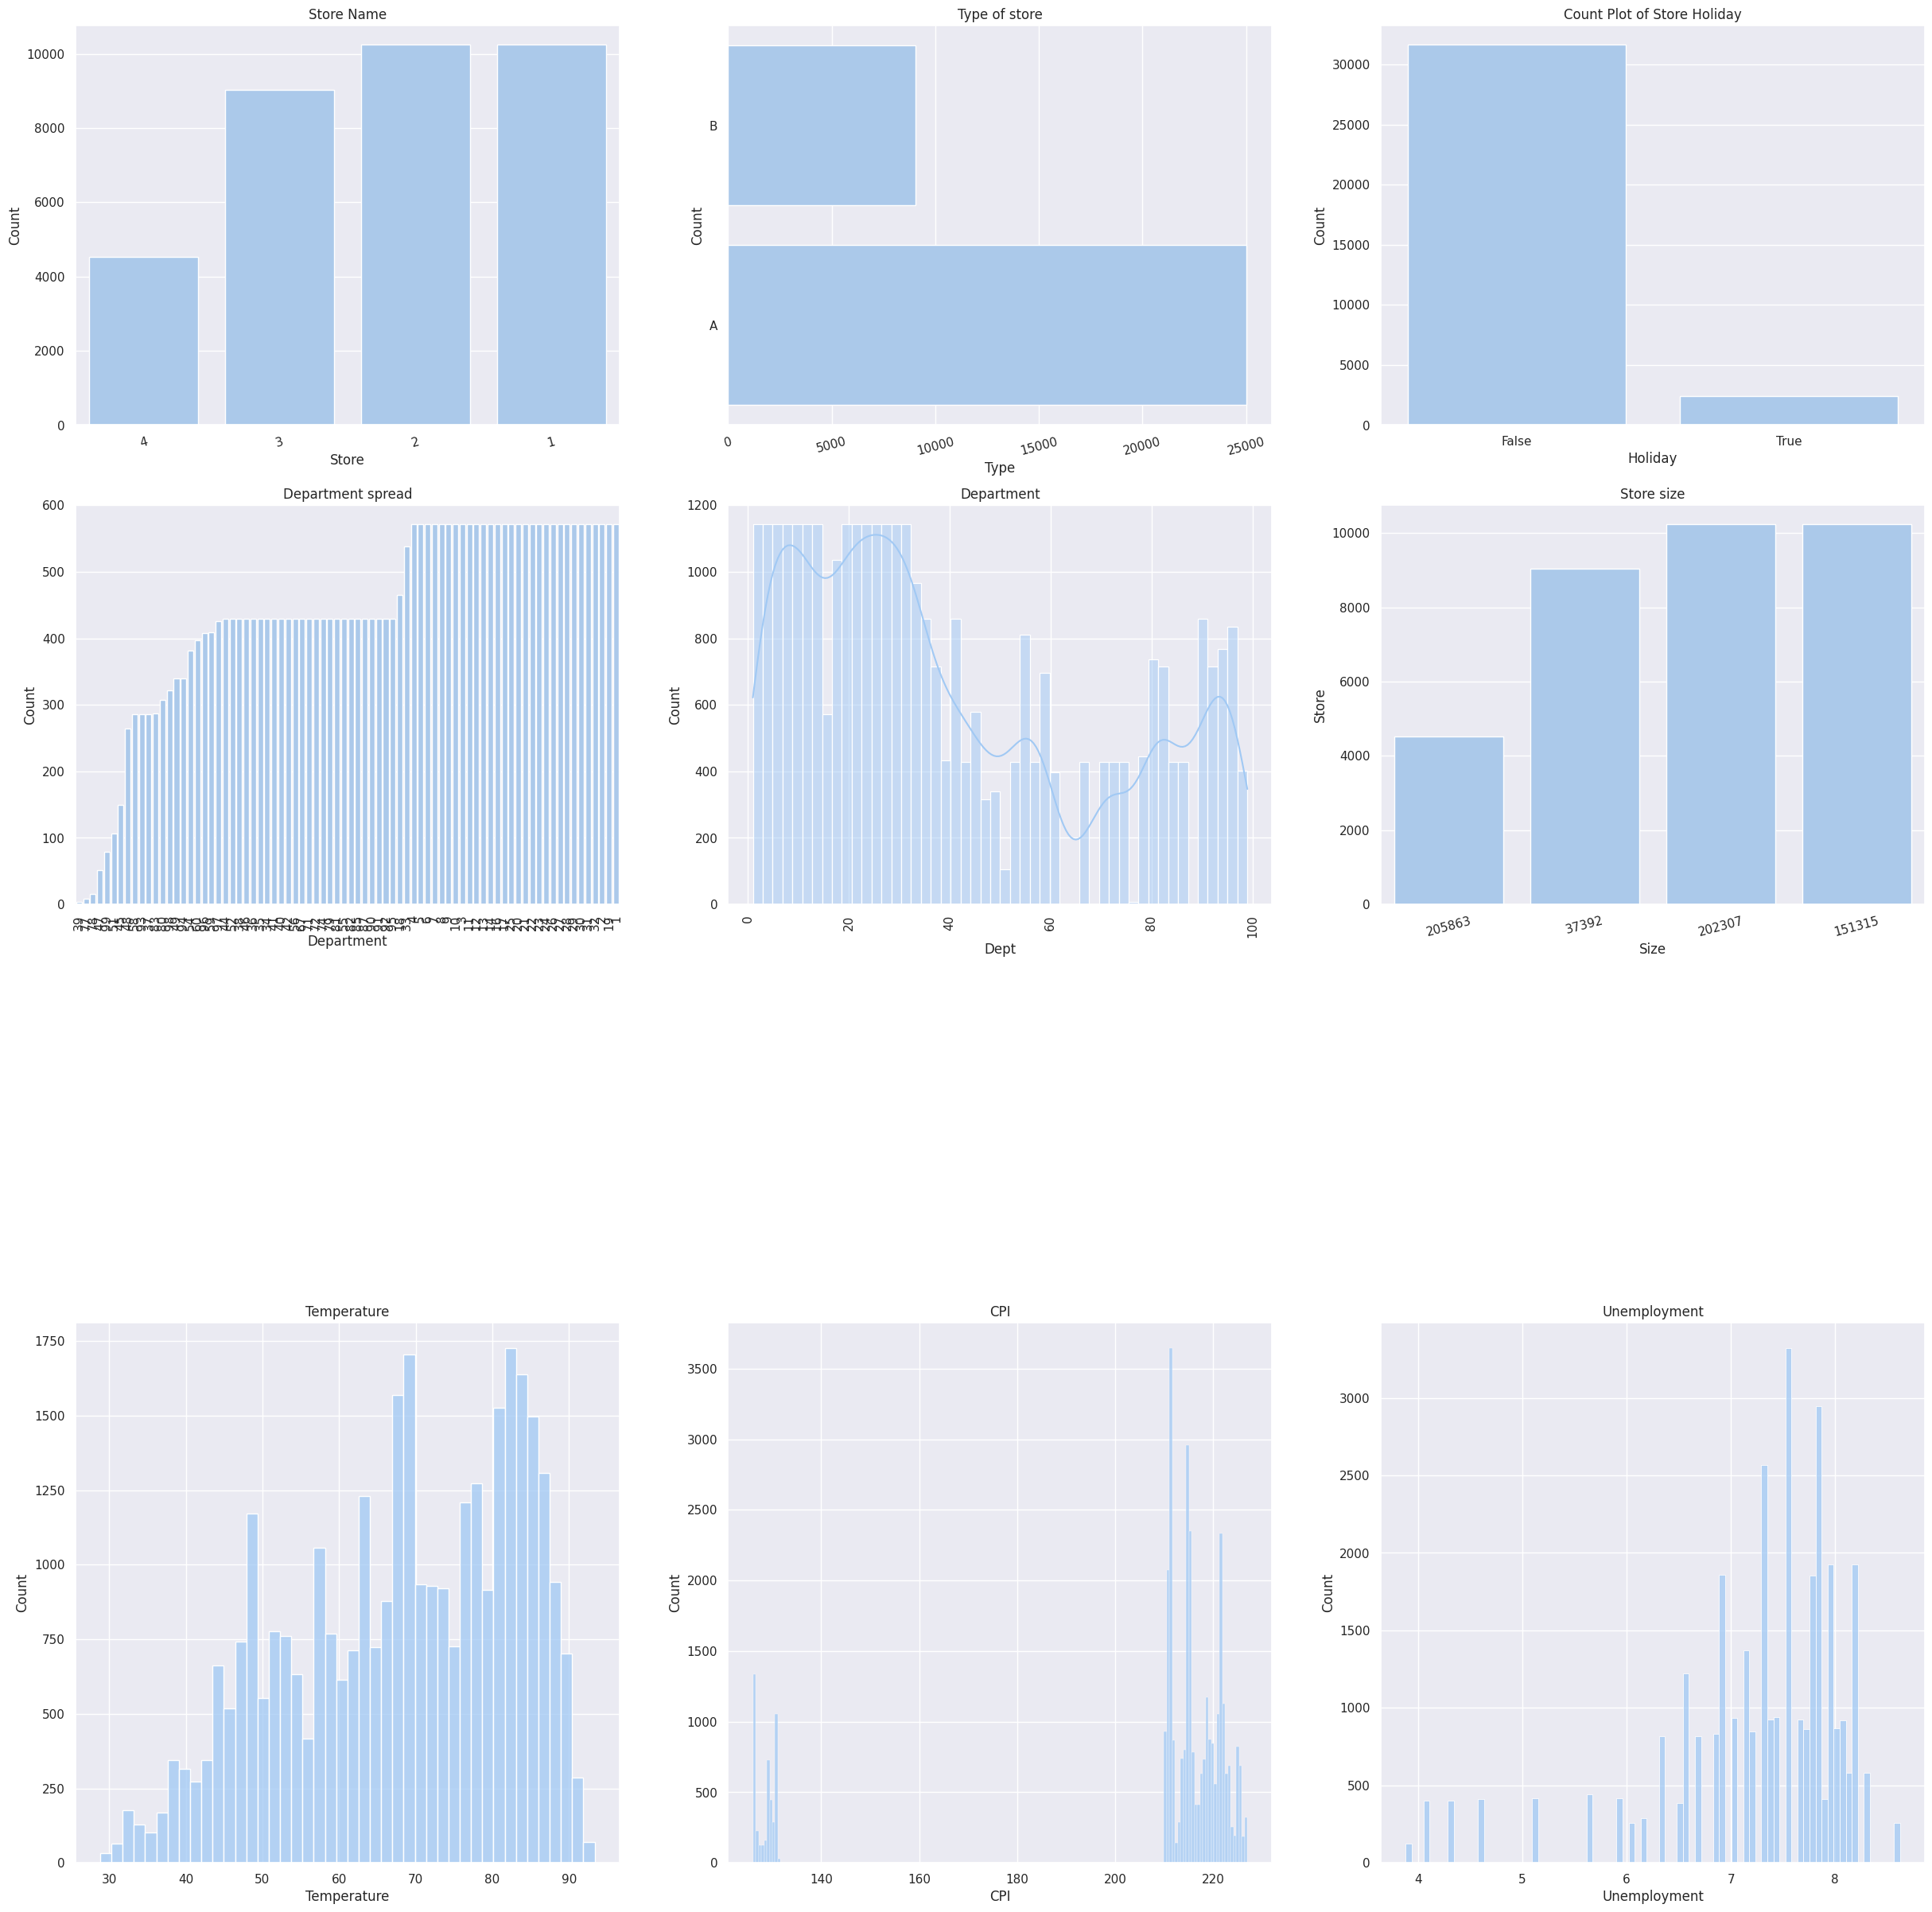

In [79]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,30))

plt.subplot(431)
sns.countplot(x = 'Store', data = stores_data,order=stores_data['Store'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Store')
plt.ylabel('Count')
plt.title('Store Name')

plt.subplot(432)
sns.countplot(stores_data['Type'],order=stores_data['Type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Type of store')

plt.subplot(433)
sns.countplot(x='IsHoliday', data=stores_data)
plt.title('Count Plot of Store Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')

plt.subplot(434)
sns.countplot(x='Dept', data=stores_data,order=stores_data['Dept'].value_counts().index[::-1])
plt.title('Department spread')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=90)


plt.subplot(435)
sns.histplot(data=stores_data, x=stores_data.Dept, kde=True, bins=50)
plt.xticks(rotation=90)
plt.xlabel('Dept')
plt.ylabel('Count')
plt.title('Department')

plt.subplot(436)
sns.countplot(x='Size', data=stores_data,order=stores_data['Size'].value_counts().index[::-1])
plt.title('Store size')
plt.xlabel('Size')
plt.ylabel('Store')
plt.xticks(rotation=15)

plt.subplot(337)
sns.histplot(stores_data['Temperature'])
plt.title('Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')


plt.subplot(338)
sns.histplot(stores_data['CPI'])
plt.title('CPI')

plt.subplot(339)
sns.histplot(stores_data['Unemployment'])
plt.title('Unemployment')

plt.tight_layout()
plt.show()

####interpretations
1. type A store are higher

###continous columns

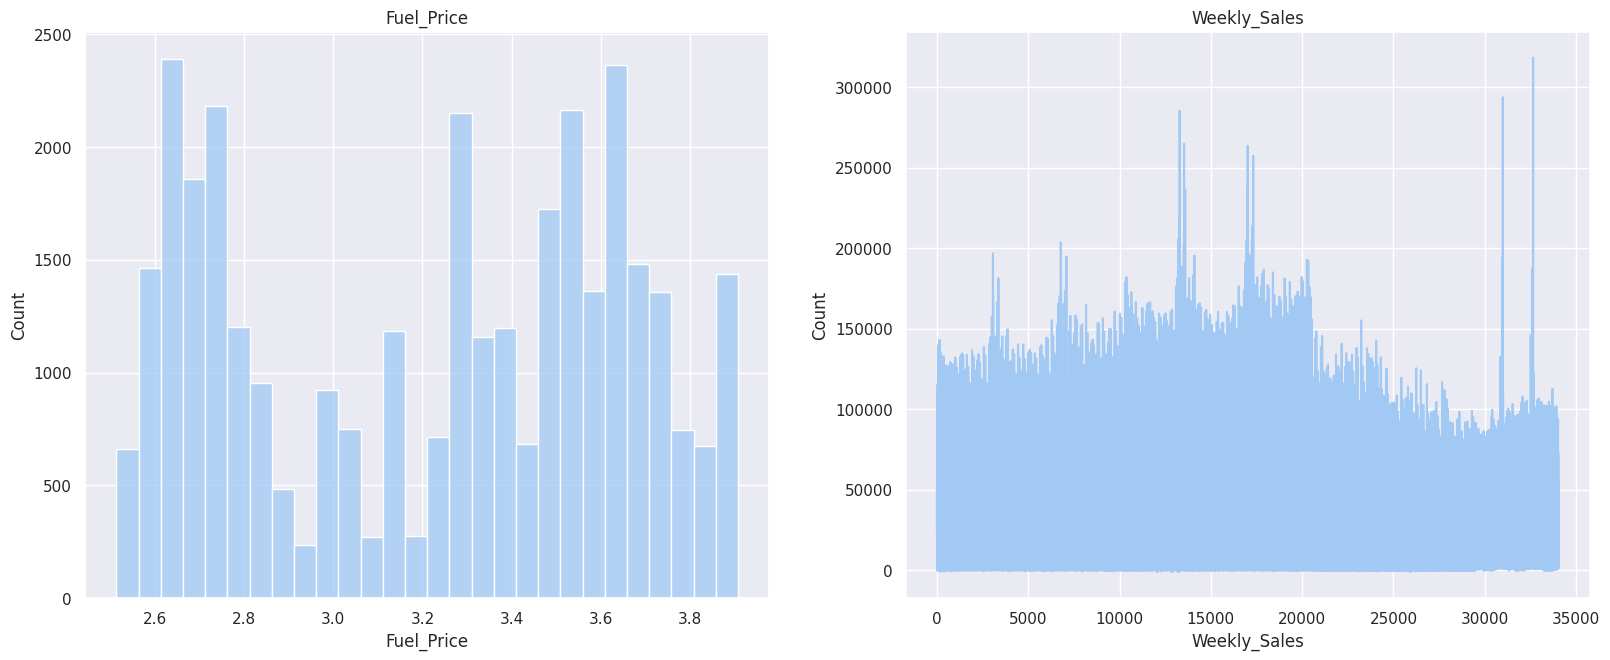

<Figure size 640x480 with 0 Axes>

In [163]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,25))

plt.subplot(331)
sns.histplot(stores_data['Fuel_Price'])
plt.title('Fuel_Price')
plt.xlabel('Fuel_Price')
plt.ylabel('Count')

plt.subplot(332)
sns.lineplot(stores_data['Weekly_Sales'])
plt.title('Weekly_Sales')
plt.xlabel('Weekly_Sales')
plt.ylabel('Count')


plt.show()
plt.tight_layout()

###FEATURE VS TARGET

cat vs target

category_columns = ["Store","Date" ,'Temperature','CPI','Unemployment',  "IsHoliday", "Dept","Type",'Size']

In [142]:
Date_order = stores_data.groupby('Date')['Weekly_Sales'].mean().reset_index()
Date_order = Date_order.sort_values('Weekly_Sales')
Temperature_order = stores_data.groupby('Temperature')['Weekly_Sales'].mean().reset_index().sort_values('Weekly_Sales')['Temperature']
cpi_order = stores_data.groupby('CPI')['Weekly_Sales'].mean().reset_index().sort_values('Weekly_Sales')['CPI']

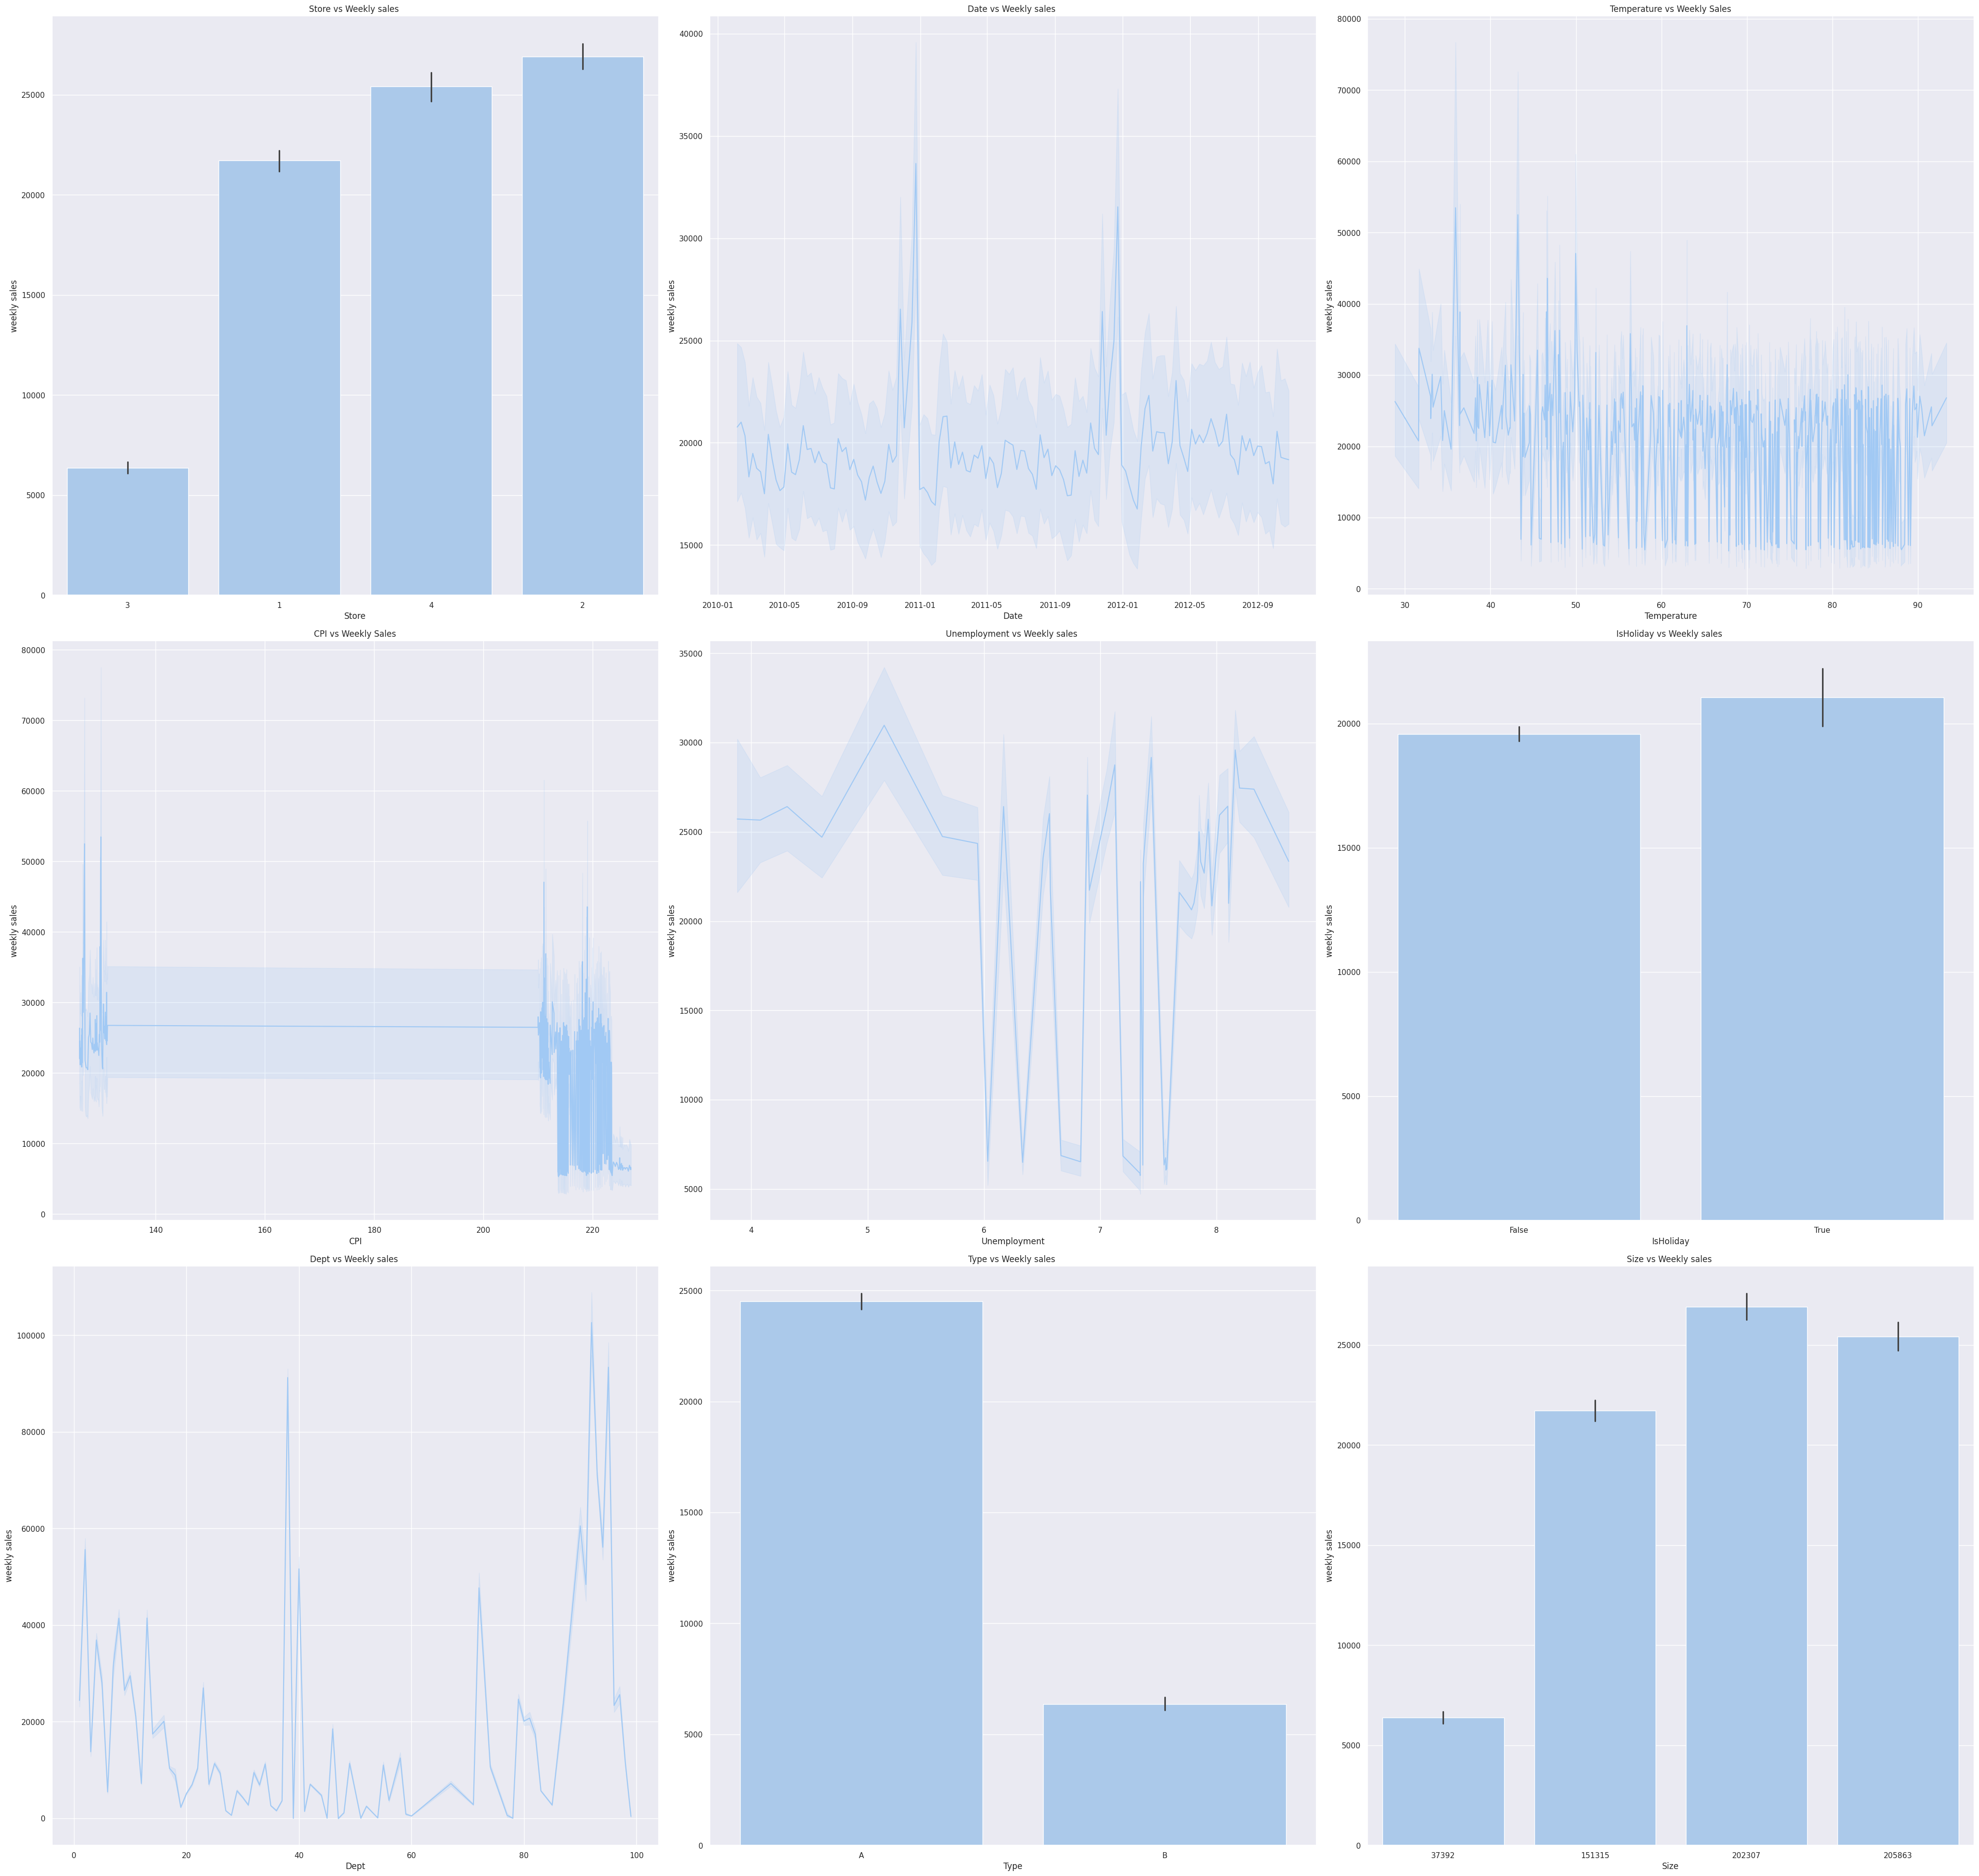

In [165]:
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(40,50))

plt.subplot(431)
sns.barplot(x = 'Store',y = 'Weekly_Sales', data=stores_data, order = stores_data.groupby('Store')['Weekly_Sales'].mean().reset_index().sort_values('Weekly_Sales')['Store'])
plt.xlabel('Store')
plt.ylabel('weekly sales')
plt.title('Store vs Weekly sales ')

plt.subplot(432)
sns.lineplot(x = 'Date',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Date')
plt.ylabel('weekly sales')
plt.title('Date vs Weekly sales ')

plt.subplot(433)
sns.lineplot(x = 'Temperature',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('Temperature')
plt.ylabel('weekly sales')
plt.title('Temperature vs Weekly Sales')

plt.subplot(434)
sns.lineplot(x = 'CPI',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('CPI')
plt.ylabel('weekly sales')
plt.title('CPI vs Weekly Sales')

plt.subplot(435)
sns.lineplot(x = 'Unemployment',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Unemployment')
plt.ylabel('weekly sales')
plt.title('Unemployment vs Weekly sales ')

plt.subplot(436)
sns.barplot(x = 'IsHoliday',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('IsHoliday')
plt.ylabel('weekly sales')
plt.title('IsHoliday vs Weekly sales ')

plt.subplot(437)
sns.lineplot(x = 'Dept',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Dept')
plt.ylabel('weekly sales')
plt.title('Dept vs Weekly sales ')

plt.subplot(438)
sns.barplot(x = 'Type',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Type')
plt.ylabel('weekly sales')
plt.title('Type vs Weekly sales ')

plt.subplot(439)
sns.barplot(x = 'Size',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Size')
plt.ylabel('weekly sales')
plt.title('Size vs Weekly sales ')


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Date vs Weekly sales ')

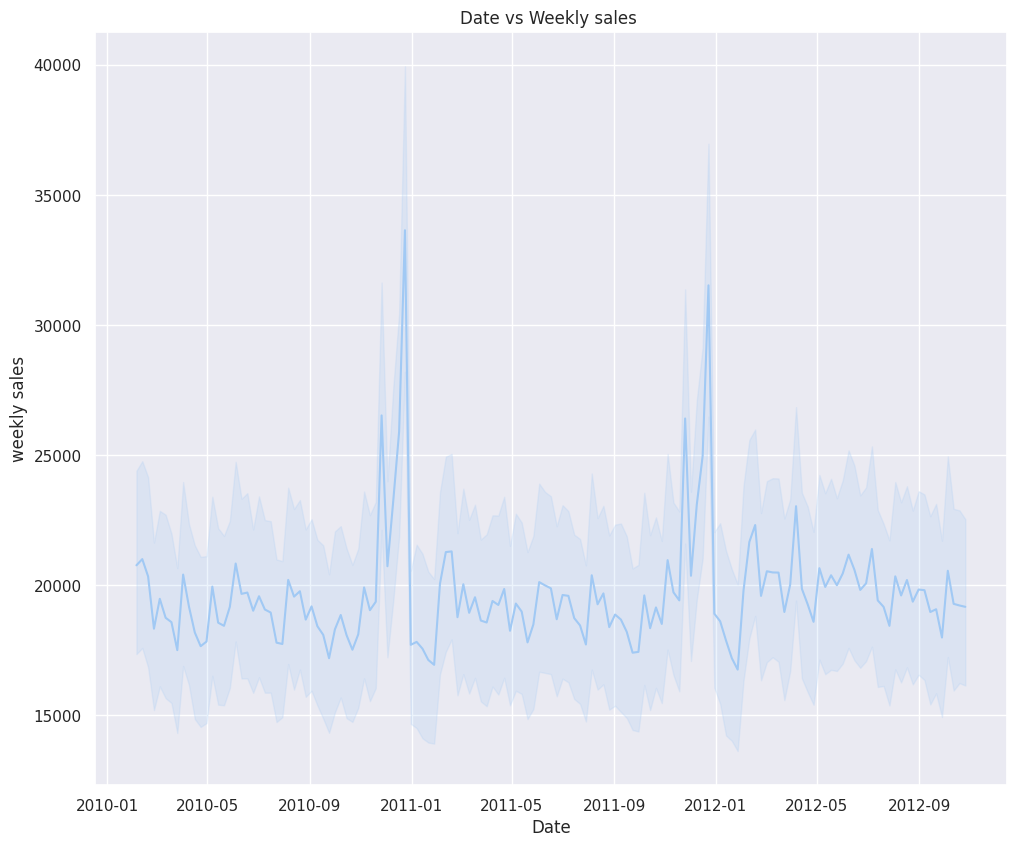

In [157]:
plt.figure(figsize=(40,45))
plt.subplot(432)
sns.lineplot(x = 'Date',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Date')
plt.ylabel('weekly sales')
plt.title('Date vs Weekly sales ')


Text(0.5, 1.0, 'Size vs Weekly sales ')

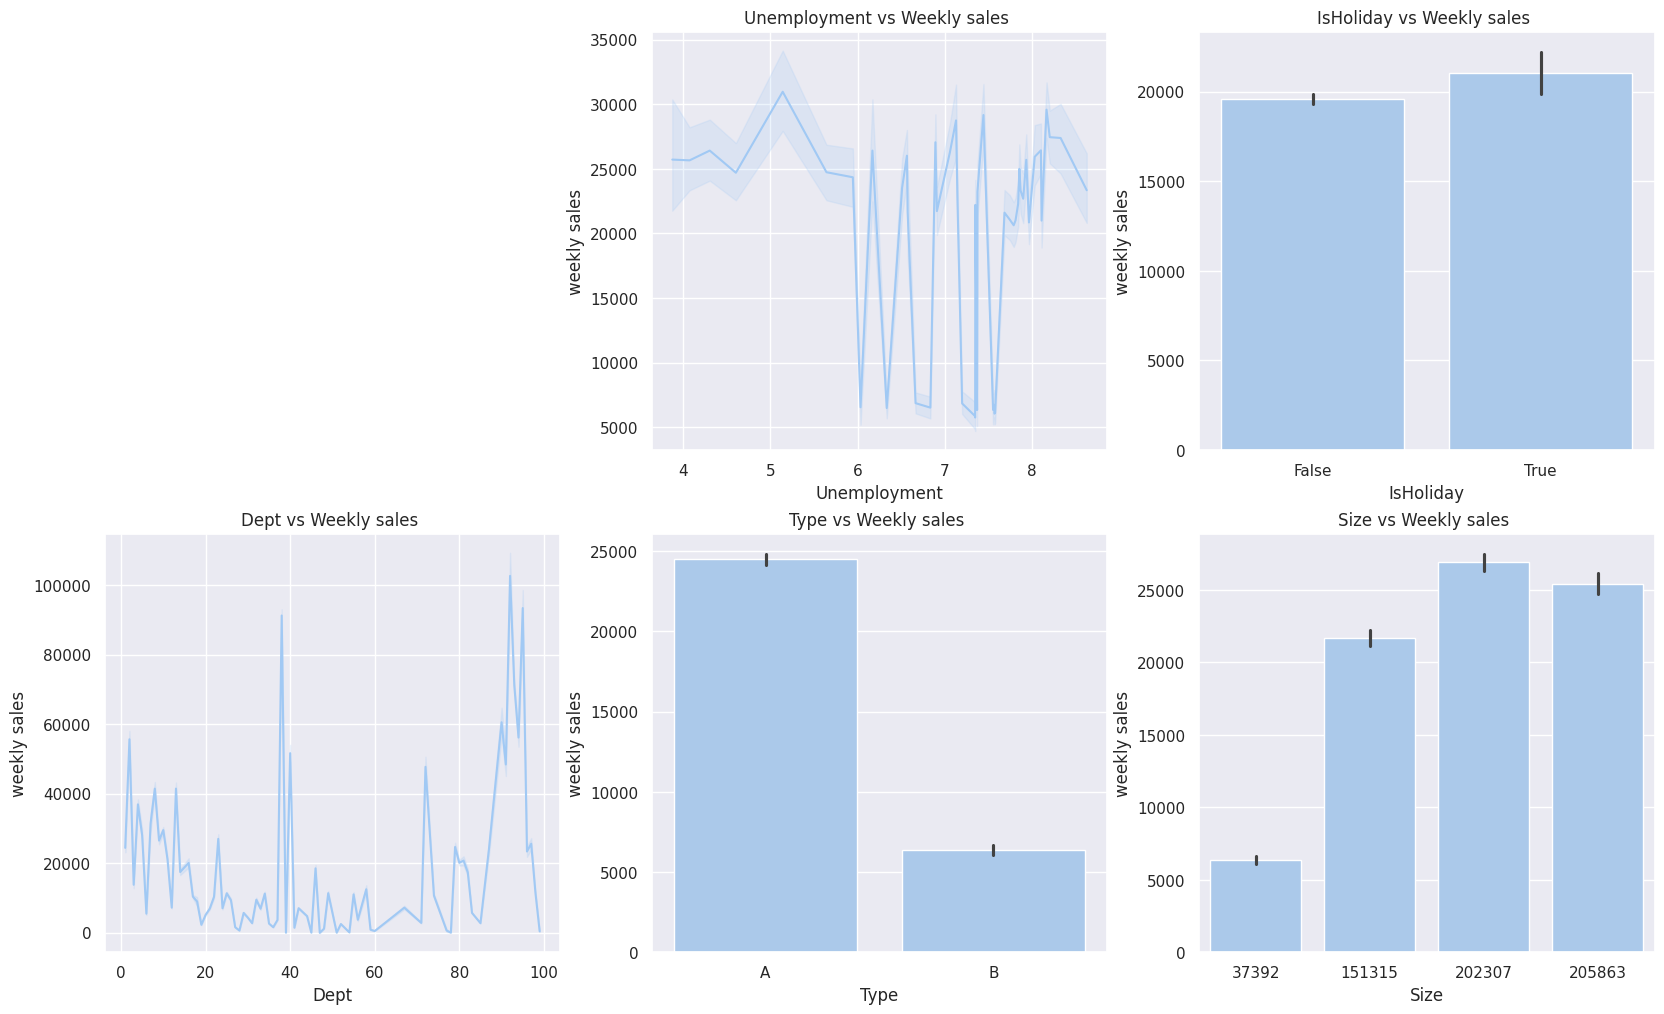

In [161]:
plt.figure(figsize=(20,25))
plt.subplot(435)
sns.lineplot(x = 'Unemployment',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Unemployment')
plt.ylabel('weekly sales')
plt.title('Unemployment vs Weekly sales ')

plt.subplot(436)
sns.barplot(x = 'IsHoliday',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('IsHoliday')
plt.ylabel('weekly sales')
plt.title('IsHoliday vs Weekly sales ')

plt.subplot(437)
sns.lineplot(x = 'Dept',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Dept')
plt.ylabel('weekly sales')
plt.title('Dept vs Weekly sales ')

plt.subplot(438)
sns.barplot(x = 'Type',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Type')
plt.ylabel('weekly sales')
plt.title('Type vs Weekly sales ')

plt.subplot(439)
sns.barplot(x = 'Size',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Size')
plt.ylabel('weekly sales')
plt.title('Size vs Weekly sales ')


INTERPRITATIONS


1.   isholiday
2.   List item



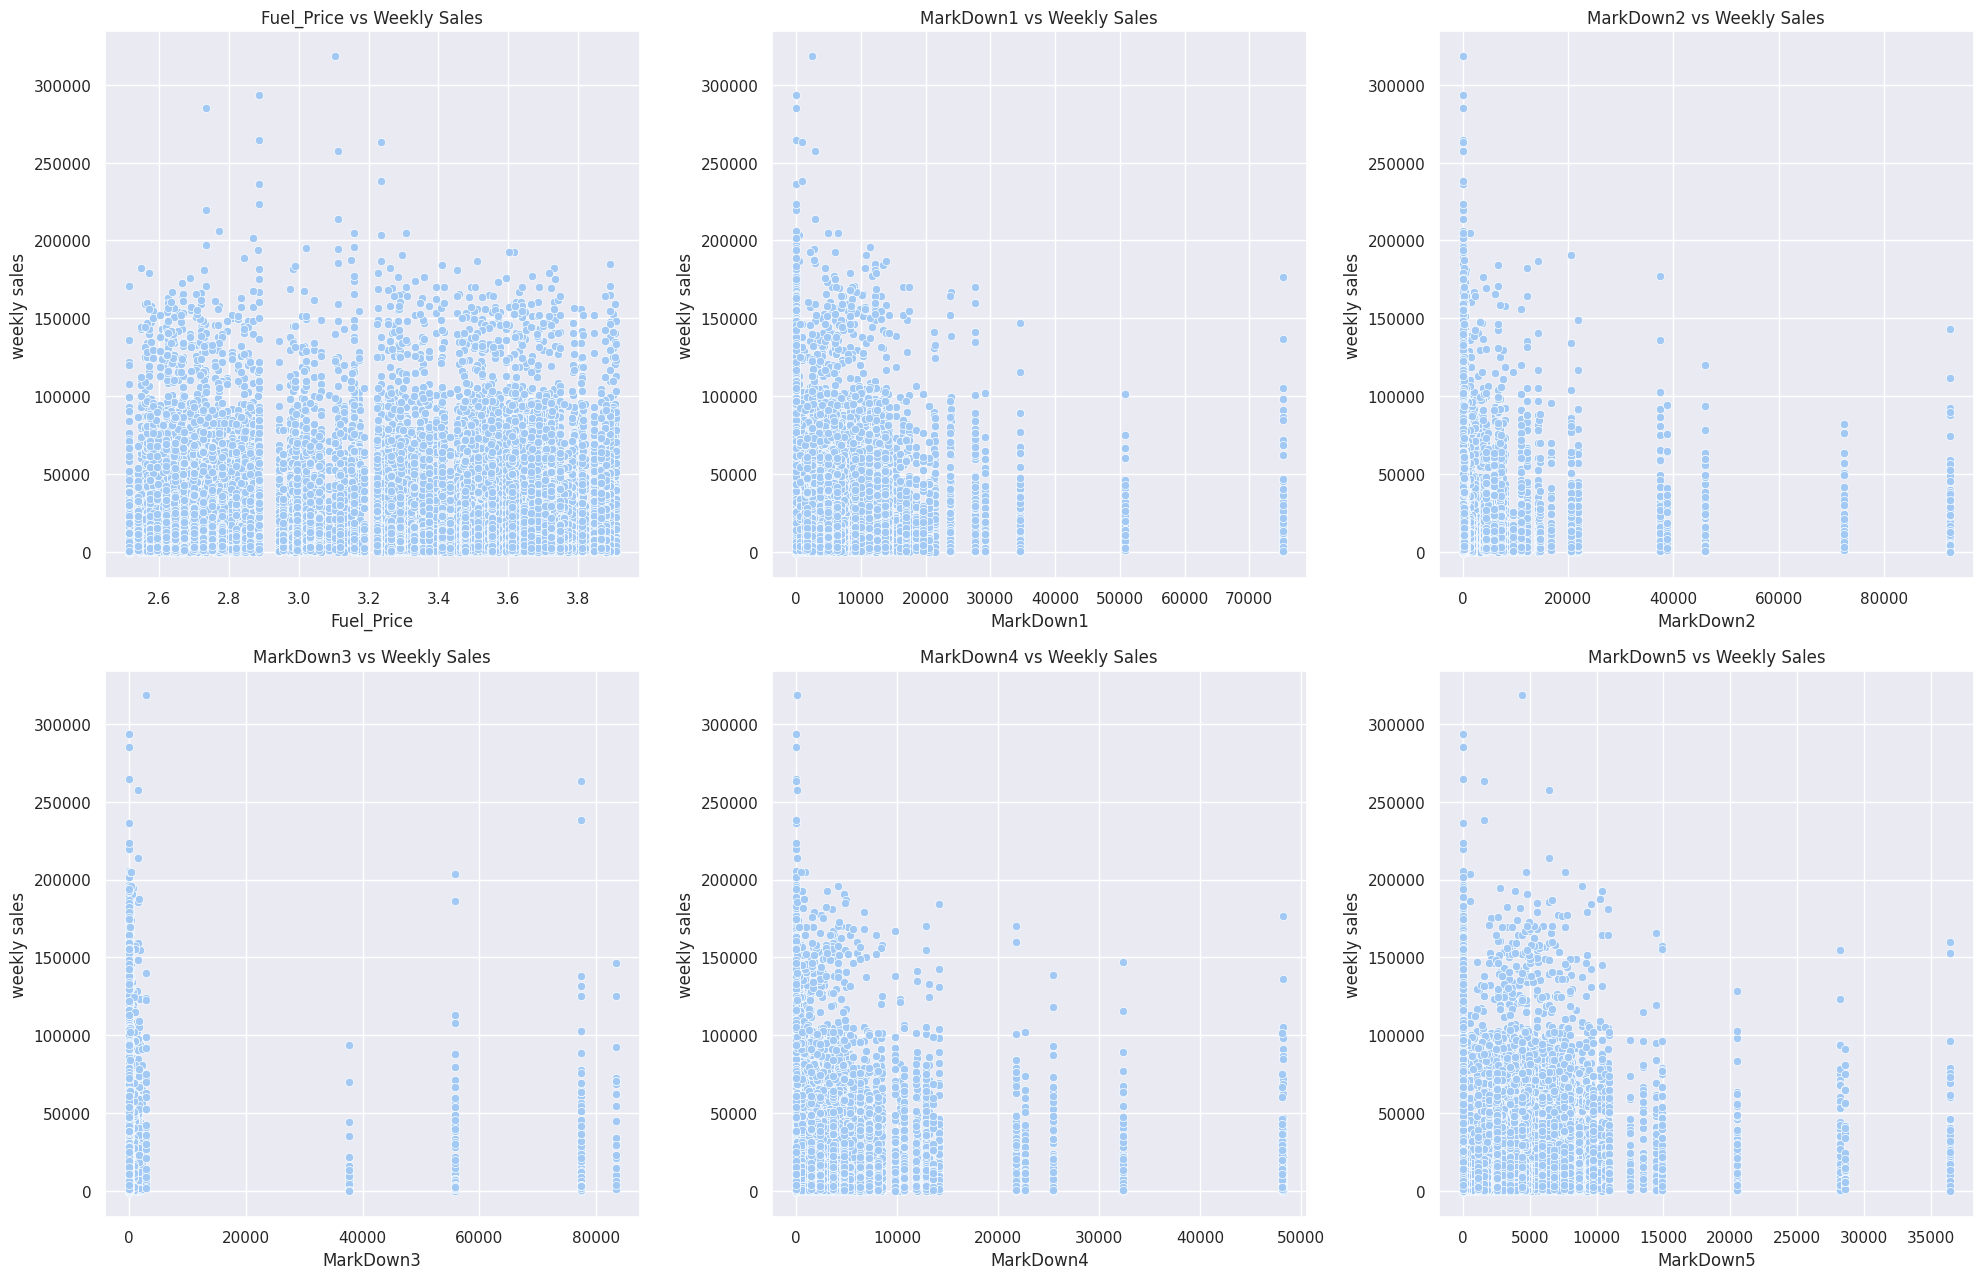

In [155]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))

plt.subplot(434)
sns.scatterplot(x = 'Fuel_Price',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('Fuel_Price')
plt.ylabel('weekly sales')
plt.title('Fuel_Price vs Weekly Sales')

plt.subplot(435)
sns.scatterplot(x = 'MarkDown1',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('MarkDown1')
plt.ylabel('weekly sales')
plt.title('MarkDown1 vs Weekly Sales')

plt.subplot(436)
sns.scatterplot(x = 'MarkDown2',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('MarkDown2')
plt.ylabel('weekly sales')
plt.title('MarkDown2 vs Weekly Sales')

plt.subplot(437)
sns.scatterplot(x = 'MarkDown3',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('MarkDown3')
plt.ylabel('weekly sales')
plt.title('MarkDown3 vs Weekly Sales')

plt.subplot(438)
sns.scatterplot(x = 'MarkDown4',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('MarkDown4')
plt.ylabel('weekly sales')
plt.title('MarkDown4 vs Weekly Sales')

plt.subplot(439)
sns.scatterplot(x = 'MarkDown5',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('MarkDown5')
plt.ylabel('weekly sales')
plt.title('MarkDown5 vs Weekly Sales')



plt.tight_layout()
plt.show()

#ENCODE

In [169]:
label_encoder = LabelEncoder()
#Date
stores_data['Date'] = label_encoder.fit_transform(stores_data['Date'])
#IsHoliday
stores_data['IsHoliday'] = label_encoder.fit_transform(stores_data['IsHoliday'])
#Type
stores_data['Type'] = label_encoder.fit_transform(stores_data['Type'])

In [171]:
stores_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,24924.50,0,151315
1,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2,50605.27,0,151315
2,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,3,13740.12,0,151315
3,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,4,39954.04,0,151315
4,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5,32229.38,0,151315


#CORR

In [172]:
stores_data.corr()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
Store,1.000000,-0.001448,-0.053399,-0.002211,-0.053054,-0.007495,0.002612,-0.029962,-0.046516,-0.640269,-0.527914,-0.000440,-0.238415,-0.092716,0.452688,-0.202477
Date,-0.001448,1.000000,0.169589,0.781597,0.495115,0.120968,0.052162,0.340757,0.508162,0.132274,-0.612570,-0.012331,0.006919,0.009135,0.001078,-0.001220
Temperature,-0.053399,0.169589,1.000000,0.237702,-0.031305,-0.226123,-0.065029,-0.029928,-0.113117,0.181886,-0.047711,-0.191798,0.045395,-0.057600,0.126885,-0.140184
Fuel_Price,-0.002211,0.781597,0.237702,1.000000,0.302869,0.018181,0.004209,0.192180,0.260459,0.104978,-0.417063,-0.085348,0.005080,-0.001180,0.000607,-0.000787
MarkDown1,-0.053054,0.495115,-0.031305,0.302869,1.000000,0.154912,-0.022424,0.883573,0.533515,0.026026,-0.365297,-0.014086,0.001446,0.059653,-0.161817,0.169895
MarkDown2,-0.007495,0.120968,-0.226123,0.018181,0.154912,1.000000,-0.008953,0.088061,0.159222,-0.009959,-0.079105,0.233982,-0.002823,0.020183,-0.069874,0.080434
MarkDown3,0.002612,0.052162,-0.065029,0.004209,-0.022424,-0.008953,1.000000,-0.020410,0.037232,-0.008209,-0.022025,0.295558,-0.000989,0.031349,-0.021582,0.025404
MarkDown4,-0.029962,0.340757,-0.029928,0.192180,0.883573,0.088061,-0.020410,1.000000,0.408648,-0.015650,-0.284240,0.005700,-0.006698,0.049123,-0.138286,0.144405
MarkDown5,-0.046516,0.508162,-0.113117,0.260459,0.533515,0.159222,0.037232,0.408648,1.000000,-0.019298,-0.386439,-0.011408,-0.010864,0.078997,-0.208184,0.218782
CPI,-0.640269,0.132274,0.181886,0.104978,0.026026,-0.009959,-0.008209,-0.015650,-0.019298,1.000000,0.491559,-0.003898,0.301372,-0.093803,0.282130,-0.402840
